# Project 3: Web APIs and Classification: Data cleaning and EDA

## Problem Statement

To assist one of our colleagues, who is a moderator of the entrepreneur subreddit, with filtering out the investing posts in the entrepreneur subreddit.
The entrepreneur subreddit is mostly filled with irrelevant posts from the investing subreddit, which causes annoyance to the business owners who share their business ideas. By constructing a classifier model, we can use it to seperate business ideas and business investment strategies for new business owners who desire to start their side hustle. The two classifier models that will be constructed will be the **Logistics Regression Classifier and the Multi-nominal Bayes Model**. The performance metric to be used for measuring against the models will be **Accuracy** as the model needs to classify the post according to their respective subreddit.

## Executive Summary

The project aims to create a classification model to distinguish posts from the entrepreneur subreddit and the investing subreddit. The posts and title were scrapped from their respective subreddits using reddit's API and the requests library. The posts were "cleaned" to remove unwanted characters and a brief exploratory data analysis was done on the dataset. 

From the analysis, Term Frequency Inverse Document Frequency (TFIDF) Vectorizer was found to perform slightly better than the Count Vectorizer. Also, Multi-nominal Naive Bayes Model performed slightly better than the Logistics Regression model even though their performance was comparable. Both models also have a higher accuracy score compared to Baseline accuracy.


### Contents:
- [Data Import & Cleaning for Entrepreneur subreddit](#Obtaining-the-data-from-entrepreneur-sub-reddit)
- [Data Import & Cleaning for Investing subreddit](#Obtaining-the-data-from-investing-sub-reddit)
- [Exploratory Data Analysis for Entrepreneur Subreddit](#EDA-on-Entrepreneurship-sub)
- [Exploratory Data Analysis for Investing Subreddit](#EDA-on-Investing-subreddit)
- [Merge the dataframes](#Merge-both-subreddit-dataframes)

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import re
from bs4 import BeautifulSoup as bs
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import random
import time

%matplotlib inline

In [2]:
# Set the graph style
plt.style.use('ggplot')

# Data importing and Cleaning

## Obtaining the data from entrepreneur sub reddit

In [3]:
def get_reddit_post(url, no_loop):
    """
    This function obtains the posts from the chosen subreddit from the url variable.
    no_loop is the number of loops 
    name is the name of the csv file to save
    """
    posts = []
    after = None
    new_df = 'No dataframe as it\'s one loop'
    name = re.search('r\/(.+).json',url).group(1) # search for the name of the sub reddit

    for loop in range(no_loop): # Number of loops
        if after == None: # If there's no next post
            current_url = url # Make use of the current url
        else:
            current_url = url + '?after=' + after # Current url becomes the next post
        print(f'Current url is: {current_url}') # Prints the current url
        res = requests.get(current_url, headers={'User-agent': 'Entre 2.0'}) # Create the request, USER AGENT can be changed

        if res.status_code != 200:
            print('Status error', res.status_code) # If error, then break
            break

        current_dict = res.json() # Parse into JSON
        current_posts = [p['data'] for p in current_dict['data']['children']] # Gets the current posts
        posts.extend(current_posts) # Store it in a list named posts
        after = current_dict['data']['after'] # Get the next url

        if loop > 0: # Saving the progress
            prev_posts = pd.read_csv('./datasets/' + name + '.csv') # Save the posts
            current_df = pd.DataFrame(current_posts) # current posts in a new dataframe
            new_df = pd.concat([prev_posts, current_df]) # Once it breaks out of for loop, new_df is gone.
            new_df.to_csv('./datasets/' + name + '.csv', index=False)
        else:
            pd.DataFrame(posts).to_csv('./datasets/' + name + '.csv', index = False)

        # generate a random sleep duration to look more 'natural'
        sleep_duration = random.randint(2,6)
        print(f'Sleep for {sleep_duration} seconds') # Sleep duration in seconds
        time.sleep(sleep_duration)
        
    return new_df

In [ ]:
# Scrap the entrepreneur subreddit posts, about 1,000 posts scrapped
get_reddit_post('https://www.reddit.com/r/entrepreneur.json',40)

In [4]:
# Read the entrepreneur csv file
entre_df = pd.read_csv('./datasets/entrepreneur.csv')

In [5]:
entre_df[['title','selftext']].loc[0] # Gets the title and text of the first post

title               Thank you Thursday! - (November 26, 2020)
selftext    Your opportunity to thank the /r/Entrepreneur ...
Name: 0, dtype: object

### Clean the data in entrepreneur sub reddit

In [6]:
# Drop the first row as it's not relevant, it's ask questions monday
entre_df.drop(labels=0, inplace=True)

In [7]:
entre_df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,link_flair_template_id,author_cakeday
1,NaN,Entrepreneur,Happy Thanksgiving everyone!\n\nToday probably...,t2_10hwkz,False,NaN,0,False,"Being driven individuals, we are all rushing t...",[],...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606411e+09,1,NaN,False,NaN,NaN
2,NaN,Entrepreneur,"Hi, recently we had a client who was strugglin...",t2_5mi25ldv,False,NaN,0,False,How you can reduce bounce rate from your webpage?,[],...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606449e+09,0,NaN,False,NaN,NaN
3,NaN,Entrepreneur,Link to video: https://youtu.be/j6QPZp--lJE\n ...,t2_17jopcwt,False,NaN,0,False,"I made an animated summary of ""The lean Start ...",[],...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606453e+09,0,NaN,False,NaN,NaN
4,NaN,Entrepreneur,Hi all I'm a 16 year old from Adelaide Austral...,t2_1bftus7y,False,NaN,0,False,Skate ramp business,"[{'e': 'text', 't': 'Recommendations?'}]",...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606390e+09,0,NaN,False,b5eccc92-6452-11e6-93ad-0ecc2c508ed9,NaN
5,NaN,Entrepreneur,Hey entrepreneurs - I recently came up with an...,t2_rxefv,False,NaN,0,False,Help with getting a textile prototype created.,[],...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606457e+09,0,NaN,False,NaN,NaN


In [8]:
# Title and Posts
entre_df[['title', 'selftext']]

,title,selftext
1,"Being driven individuals, we are all rushing t...",Happy Thanksgiving everyone!\n\nToday probably...
2,How you can reduce bounce rate from your webpage?,"Hi, recently we had a client who was strugglin..."
3,"I made an animated summary of ""The lean Start ...",Link to video: https://youtu.be/j6QPZp--lJE\n ...
4,Skate ramp business,Hi all I'm a 16 year old from Adelaide Austral...
5,Help with getting a textile prototype created.,Hey entrepreneurs - I recently came up with an...
...,...,...
993,Me again with another side hustle vid for feed...,"G'day guys, \nBack again with the second part..."
994,"I made an animated summary of ""The Magic of Th...",Link to video: https://youtu.be/wdQRQ82AED8\n ...
995,Tik tok marketing?,Have been seeing a lot lately from startups tr...
996,How to make passive income,This is the best way to earn money from HOme\n...


In [9]:
# Merge the title and post together using pd.concat
entre_df_merged = pd.concat([entre_df['title'], entre_df['selftext']], axis=0)
entre_df_merged = pd.DataFrame(entre_df_merged, columns=['text'])

In [10]:
# Add the labels to the dataframe, filled with ones
entre_df_merged['label'] = np.ones(len(entre_df_merged))
entre_df_merged

,text,label
1,"Being driven individuals, we are all rushing t...",1.0
2,How you can reduce bounce rate from your webpage?,1.0
3,"I made an animated summary of ""The lean Start ...",1.0
4,Skate ramp business,1.0
5,Help with getting a textile prototype created.,1.0
...,...,...
993,"G'day guys, \nBack again with the second part...",1.0
994,Link to video: https://youtu.be/wdQRQ82AED8\n ...,1.0
995,Have been seeing a lot lately from startups tr...,1.0
996,This is the best way to earn money from HOme\n...,1.0


In [11]:
# Full function to clean the title and the post
def clean_post(df):
    """
    This function removes the unnecessary characters, punctuations, removes stop words and lemmantizes the words
    from the posts and titles. Lemmantization is used as I want to preserve the meaning of the words in which it'll compare the words against a dictionary.
    """
    new_lst = []
    
    # Stop words
    stops = set(stopwords.words('english'))
    
    # Lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    for post in df:
        # Lowercase the text
        post = post.lower()

        # Find the https websites and removes them
        post = re.sub('\(https:.*?\)','',post)

        # Removes youtube links
        post = re.sub('https:.*?\\n','',post)

        # Removes uncaptured url links at the bottom of the text
        post = re.sub('https.*?[\\n|"]','',post)

        # Removes characters: \n\n&amp;#x200B;
        post = re.sub('\\n\\n&amp;#x200b;\\n\\n','',post)

        # Removing the special characters, like punctuation marks, periods
        # post = re.sub(r'[^\w]',' ',post)
        
        # Removes digits and keeps the letters
        post = re.sub(r'[^a-zA-Z]', ' ', post)

        # Removes underscores
        post = re.sub(' _', ' ',post)

        # Removes addtional white spaces
        post = re.sub(' +', ' ',post)
        
        # Removes words that have entrepreneur variations
        post = post.replace('entrepreneur','').replace('Entrepreneur','')
        
        # Removes words that have invest variations
        post = post.replace('invest','').replace('investor','')
        
        # Stores the words in a list 
        lst = [] 
        
        # If the word is not in the stop words then, lemmantize the words
        for word in post.split():
            if not word in stops:
                lst.append(lemmatizer.lemmatize(word))
            
        new_lst.append(" ".join(lst))
        
    return new_lst

In [12]:
entre_df_merged['text'] = clean_post(entre_df_merged['text'])
entre_df_merged

,text,label
1,driven individual rushing towards dream ever s...,1.0
2,reduce bounce rate webpage,1.0
3,made animated summary lean start eric ries hop...,1.0
4,skate ramp business,1.0
5,help getting textile prototype created,1.0
...,...,...
993,g day guy back second part disjoined series th...,1.0
994,link video release new video often interested ...,1.0
995,seeing lot lately startup trying figure tik to...,1.0
996,best way earn money home check video http www ...,1.0


In [13]:
# Drop duplicate posts
entre_df_merged = entre_df_merged.drop_duplicates(subset=['text'])
entre_df_merged

,text,label
1,driven individual rushing towards dream ever s...,1.0
2,reduce bounce rate webpage,1.0
3,made animated summary lean start eric ries hop...,1.0
4,skate ramp business,1.0
5,help getting textile prototype created,1.0
...,...,...
592,like start product photography service stick l...,1.0
593,im reading around sub around reddit building b...,1.0
594,fluffy content goal build arr business right p...,1.0
595,hi merchant holiday season coming real soon be...,1.0


In [14]:
# Checking for null values
entre_df_merged.isnull().sum()

text     0
label    0
dtype: int64

In [15]:
# Checking for duplicates
entre_df_merged.duplicated().sum()

0

### Save to cleaned_entre_df to csv file

In [ ]:
entre_df_merged.to_csv('./datasets/cleaned_entre_df.csv', index=False)

# Obtaining the data from investing sub reddit

In [ ]:
get_reddit_post("https://www.reddit.com/r/investing.json",40)

In [16]:
invest_df = pd.read_csv('./datasets/investing.csv')
invest_df

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday
0,NaN,investing,"Alright everyone, it looks like we had pretty ...",t2_p8vmm,False,NaN,1,False,Formal posting guidelines for political topics...,[],...,/r/investing/comments/cyee69/formal_posting_gu...,all_ads,True,https://www.reddit.com/r/investing/comments/cy...,1210867,1.567366e+09,2,NaN,False,NaN
1,NaN,investing,"If your question is ""I have $10,000, what do I...",t2_6l4z3,False,NaN,0,False,Daily Advice Thread - All basic help or advice...,[],...,/r/investing/comments/k1e64o/daily_advice_thre...,all_ads,True,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606393e+09,0,NaN,False,NaN
2,NaN,investing,"Hi everyone,\n\nI work as a PM at a large tech...",t2_4dhite7i,False,NaN,0,False,Key Takeaways from the Airbnb IPO filing,[],...,/r/investing/comments/k1qvku/key_takeaways_fro...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606437e+09,1,NaN,False,NaN
3,NaN,investing,BlackRock Inc. acquired a new position in shar...,t2_84egmxgw,False,NaN,0,False,BlackRock Inc. Invests $278.34 Million more in...,[],...,/r/investing/comments/k1rka0/blackrock_inc_inv...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606440e+09,1,NaN,False,NaN
4,NaN,investing,[PLTR stock data.](https://imgur.com/a/T5V7OEy...,t2_7r79rqlg,False,NaN,0,False,PLTR jumps 12% even though US market's closed,[],...,/r/investing/comments/k1euv4/pltr_jumps_12_eve...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606396e+09,0,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,investing,My research found VXUS and VTIAX have identica...,t2_usz9c,False,NaN,0,False,"comparison question about, VXUS -vs- VTIAX, To...",[],...,/r/investing/comments/ju54cu/comparison_questi...,all_ads,False,https://www.reddit.com/r/investing/comments/ju...,1210868,1.605373e+09,0,NaN,False,NaN
988,NaN,investing,"Just wondering, what are the likelihood $BABA ...",t2_7xolk5wy,False,NaN,0,False,$NIO and $BABA,[],...,/r/investing/comments/jtruyy/nio_and_baba/,all_ads,False,https://www.reddit.com/r/investing/comments/jt...,1210868,1.605313e+09,0,NaN,False,NaN
989,NaN,investing,[https://www.reuters.com/article/usa-china-sec...,t2_15ayrm,False,NaN,0,False,Trump administration bans U.S. investments in ...,[],...,/r/investing/comments/jt3hj6/trump_administrat...,all_ads,False,https://www.reddit.com/r/investing/comments/jt...,1210868,1.605216e+09,0,NaN,False,NaN
990,NaN,investing,"Hi,\n\nI need to perform a risk adjusted perfo...",t2_4yjc9ug1,False,NaN,0,False,Risk Free Rate for Risk-adjusted performance e...,[],...,/r/investing/comments/ju23in/risk_free_rate_fo...,all_ads,False,https://www.reddit.com/r/investing/comments/ju...,1210868,1.605361e+09,0,NaN,False,NaN


### Clean the data in investing sub reddit

In [17]:
# Check for duplicates
invest_df.duplicated(subset='selftext').sum()

490

In [18]:
# Drop duplicates
invest_df = invest_df.drop_duplicates(subset=['selftext'])
invest_df

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday
0,NaN,investing,"Alright everyone, it looks like we had pretty ...",t2_p8vmm,False,NaN,1,False,Formal posting guidelines for political topics...,[],...,/r/investing/comments/cyee69/formal_posting_gu...,all_ads,True,https://www.reddit.com/r/investing/comments/cy...,1210867,1.567366e+09,2,NaN,False,NaN
1,NaN,investing,"If your question is ""I have $10,000, what do I...",t2_6l4z3,False,NaN,0,False,Daily Advice Thread - All basic help or advice...,[],...,/r/investing/comments/k1e64o/daily_advice_thre...,all_ads,True,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606393e+09,0,NaN,False,NaN
2,NaN,investing,"Hi everyone,\n\nI work as a PM at a large tech...",t2_4dhite7i,False,NaN,0,False,Key Takeaways from the Airbnb IPO filing,[],...,/r/investing/comments/k1qvku/key_takeaways_fro...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606437e+09,1,NaN,False,NaN
3,NaN,investing,BlackRock Inc. acquired a new position in shar...,t2_84egmxgw,False,NaN,0,False,BlackRock Inc. Invests $278.34 Million more in...,[],...,/r/investing/comments/k1rka0/blackrock_inc_inv...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606440e+09,1,NaN,False,NaN
4,NaN,investing,[PLTR stock data.](https://imgur.com/a/T5V7OEy...,t2_7r79rqlg,False,NaN,0,False,PLTR jumps 12% even though US market's closed,[],...,/r/investing/comments/k1euv4/pltr_jumps_12_eve...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606396e+09,0,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,NaN,investing,I was just trying to learn about various inves...,t2_56pmc,False,NaN,0,False,"Are TIPS just an inflation protection, or are ...",[],...,/r/investing/comments/jszuc1/are_tips_just_an_...,all_ads,False,https://www.reddit.com/r/investing/comments/js...,1210867,1.605205e+09,0,NaN,False,NaN
511,NaN,investing,I won't pretend to know a lot about finance or...,t2_5zeq1a0m,False,NaN,0,False,Concerned About Massive Corporate Debt / Equit...,[],...,/r/investing/comments/jsuck5/concerned_about_m...,all_ads,False,https://www.reddit.com/r/investing/comments/js...,1210867,1.605187e+09,0,NaN,False,NaN
512,NaN,investing,[Bill Ackman Bets Against Market Recovery Agai...,t2_bkamb,False,NaN,0,False,Bill Ackman Bets Against Market Recovery Again...,[],...,/r/investing/comments/jsnk57/bill_ackman_bets_...,all_ads,False,https://www.reddit.com/r/investing/comments/js...,1210867,1.605153e+09,0,NaN,False,NaN
513,NaN,investing,\n\nThe news that the COVID-19 vaccine from d...,t2_64kbe7ff,False,NaN,0,False,Goldman Sachs has just boosted its S&amp;P Tar...,[],...,/r/investing/comments/jssdj1/goldman_sachs_has...,all_ads,False,https://www.reddit.com/r/investing/comments/js...,1210867,1.605177e+09,0,NaN,False,NaN


In [19]:
# Drop the first row as it's not relevant, it's ask questions monday
invest_df.drop(labels=[0,1], inplace=True)

C:\Users\Trogg\anaconda3\envs\mlbook\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
# Merge the title and post together using pd.concat
invest_df_merged = pd.concat([invest_df['title'], invest_df['selftext']], axis=0)
invest_df_merged = pd.DataFrame(invest_df_merged, columns=['text'])

In [21]:
# Add the labels to the dataframe
invest_df_merged['label'] = np.zeros(len(invest_df_merged))
invest_df_merged

,text,label
2,Key Takeaways from the Airbnb IPO filing,0.0
3,BlackRock Inc. Invests $278.34 Million more in...,0.0
4,PLTR jumps 12% even though US market's closed,0.0
5,Japan's Stock-Playing Central Bank Racks Up $5...,0.0
6,Why should we expect the S&amp;P 500 to rise i...,0.0
...,...,...
510,I was just trying to learn about various inves...,0.0
511,I won't pretend to know a lot about finance or...,0.0
512,[Bill Ackman Bets Against Market Recovery Agai...,0.0
513,\n\nThe news that the COVID-19 vaccine from d...,0.0


In [22]:
# Clean the post with clean_post function
invest_df_merged.text = clean_post(invest_df_merged.text)
invest_df_merged

,text,label
2,key takeaway airbnb ipo filing,0.0
3,blackrock inc million palantir technology inc ...,0.0
4,pltr jump even though u market closed,0.0
5,japan stock playing central bank rack billion ...,0.0
6,expect amp p rise long run ftse moving sideway...,0.0
...,...,...
510,trying learn various ing strategy came across ...,0.0
511,pretend know lot finance economics sold positi...,0.0
512,bill ackman bet market recovery despite covid ...,0.0
513,news covid vaccine drugmaker pfizer pfe partne...,0.0


In [23]:
# Checking for null values
invest_df_merged.isnull().sum()

text     0
label    0
dtype: int64

In [24]:
# Checking for duplicates
invest_df_merged.duplicated().sum()

0

### Save to cleaned_invest_df to csv file

In [25]:
invest_df_merged.to_csv('./datasets/cleaned_invest_df.csv', index=False)

# Exploratory Data Analysis

## EDA on Entrepreneurship sub 

### Distribution of frequency of the words

In [26]:
list_of_words = " ".join(entre_df_merged.text).split()
list_of_words

['driven',
 'individual',
 'rushing',
 'towards',
 'dream',
 'ever',
 'stop',
 'ask',
 'point',
 'hustle',
 'nothing',
 'innate',
 'desire',
 'create',
 'impact',
 'reflecting',
 'lot',
 'would',
 'love',
 'know',
 'feeling',
 'reduce',
 'bounce',
 'rate',
 'webpage',
 'made',
 'animated',
 'summary',
 'lean',
 'start',
 'eric',
 'ries',
 'hope',
 'useful',
 'skate',
 'ramp',
 'business',
 'help',
 'getting',
 'textile',
 'prototype',
 'created',
 'degree',
 'phd',
 'eminent',
 'college',
 'ensure',
 'financial',
 'freedom',
 'executing',
 'idea',
 'random',
 'thought',
 'list',
 'question',
 'vcs',
 'or',
 'ask',
 'startup',
 'founder',
 'google',
 'sheet',
 'creating',
 'product',
 'adding',
 'additional',
 'class',
 'trademark',
 'application',
 'increase',
 'chance',
 'getting',
 'trademark',
 'month',
 'startup',
 'going',
 'startup',
 'starting',
 'reddit',
 'please',
 'going',
 'wrong',
 'use',
 'giveaway',
 'grow',
 'audience',
 'without',
 'douche',
 'pandemic',
 'add',
 'mom'

In [29]:
# Create a dictionary for the frequency of words
word_dict = {}
for word in list_of_words:
    if word in word_dict:
        word_dict[word] = word_dict[word] + 1
    else:
        word_dict[word] = 1

In [30]:
# Most frequently occuring word
max(word_dict, key=word_dict.get)

'business'

In [31]:
# Sort the words frequency in descending order
sort_words_freq = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

for i in sort_words_freq[:10]:
    print(i[0], i[1])

business 815
people 481
like 453
get 450
would 430
product 405
one 384
idea 380
time 375
want 367


In [32]:
# Adding it into a dataframe
entre_freq_df = pd.DataFrame(sort_words_freq, columns=['word','frequency'])
entre_freq_df

,word,frequency
0,business,815
1,people,481
2,like,453
3,get,450
4,would,430
...,...,...
7490,dynamodb,1
7491,gb,1
7492,bandwidth,1
7493,auditing,1


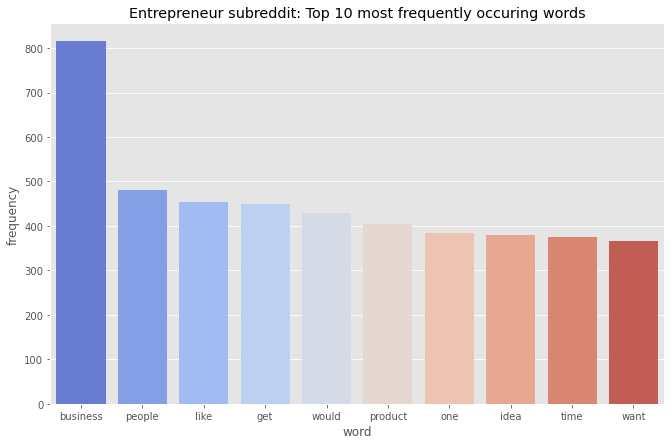

In [34]:
plt.figure(figsize=(11,7))
sns.barplot(x='word', y='frequency', data=entre_freq_df[:10], palette='coolwarm')
plt.title('Entrepreneur subreddit: Top 10 most frequently occuring words');

Given that entrepreneur sub reddit is where business minded people share their business ideas, it's not surprising to see the word 'business' coming in top with a count of 800, followed by the word 'people'. This shows that businesses primarily involves social interactions for them to function. There's seems to be a large drop after the word 'business', with the other words having a range of 400.

### Distribution of length of text for titles and posts

#### Title

In [35]:
# Reset the index
entre_df_merged = entre_df_merged.reset_index(drop=True)
entre_df_merged

,text,label
0,driven individual rushing towards dream ever s...,1.0
1,reduce bounce rate webpage,1.0
2,made animated summary lean start eric ries hop...,1.0
3,skate ramp business,1.0
4,help getting textile prototype created,1.0
...,...,...
1162,like start product photography service stick l...,1.0
1163,im reading around sub around reddit building b...,1.0
1164,fluffy content goal build arr business right p...,1.0
1165,hi merchant holiday season coming real soon be...,1.0


In [36]:
# Slicing the titles
entre_df_merged_title = pd.DataFrame(entre_df_merged.text.loc[:596])
entre_df_merged_title

,text
0,driven individual rushing towards dream ever s...
1,reduce bounce rate webpage
2,made animated summary lean start eric ries hop...
3,skate ramp business
4,help getting textile prototype created
...,...
592,previous company working year evaporated march...
593,hey everybody partner ramping launch e sport n...
594,confess read mom test yes ultimate guide custo...
595,hi checking see anyone experience candy shop t...


In [37]:
# Split the words into a list and then count the number of words
entre_df_merged_title['length'] = entre_df_merged_title.text.apply(lambda x:len(x.split()))

In [38]:
entre_df_merged_title.head()

,text,length
0,driven individual rushing towards dream ever s...,21
1,reduce bounce rate webpage,4
2,made animated summary lean start eric ries hop...,9
3,skate ramp business,3
4,help getting textile prototype created,5


(0.0, 50.0)

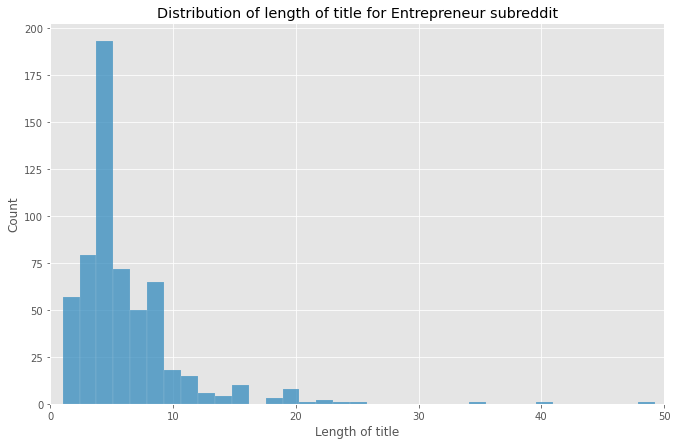

In [39]:
plt.figure(figsize=(11,7))
sns.histplot(data=entre_df_merged_title.length, bins=500)

plt.title('Distribution of length of title for Entrepreneur subreddit')
plt.xlabel('Length of title')
plt.xlim(0,50)

The distribution shows a heavy right-skewed graph, with most of the titles having a length of 5 and most of the titles fall in the range between 2 to 9.

#### Posts

In [40]:
# Slicing the posts
entre_df_merged_post = pd.DataFrame(entre_df_merged.text.loc[597:])
entre_df_merged_post

,text
597,hey guy long post bear think may helpful brand...
598,whether working learning guitar work around ho...
599,greeting father started couple year ago transp...
600,bf think make candle find exciting though last...
601,yesterday posted log second day k day challeng...
...,...
1162,like start product photography service stick l...
1163,im reading around sub around reddit building b...
1164,fluffy content goal build arr business right p...
1165,hi merchant holiday season coming real soon be...


In [41]:
# Split the words into a list and then count the number of words
entre_df_merged_post['length'] = entre_df_merged_post.text.apply(lambda x:len(x.split()))

In [42]:
entre_df_merged_post.head()

,text,length
597,hey guy long post bear think may helpful brand...,391
598,whether working learning guitar work around ho...,21
599,greeting father started couple year ago transp...,120
600,bf think make candle find exciting though last...,100
601,yesterday posted log second day k day challeng...,175


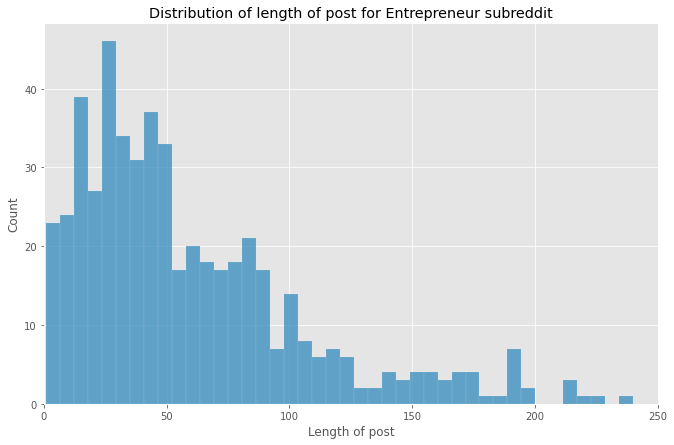

In [43]:
plt.figure(figsize=(11,7))
sns.histplot(data=entre_df_merged_post.length, bins=500)

plt.title('Distribution of length of post for Entrepreneur subreddit')
plt.xlabel('Length of post')
plt.xlim(0,250);

The distribution for the length of the posts for the Entrepreneur subreddit shows a right-tailed skewed graph. Most of the posts have an average of 25 words in their posts and the range is between 25 to 50.

### Timing of the posts

In [44]:
# Find the columns with time zone
entre_df.columns[entre_df.columns.str.contains('utc|time|created')]

Index(['approved_at_utc', 'created', 'banned_at_utc', 'created_utc'], dtype='object')

In [45]:
# Drop the duplicates
entre_df_time = entre_df[['title','selftext','created_utc']].drop_duplicates(subset=['selftext']).drop(['title','selftext'], axis=1)
entre_df_time

,created_utc
1,1.606411e+09
2,1.606449e+09
3,1.606453e+09
4,1.606390e+09
5,1.606457e+09
...,...
592,1.605563e+09
593,1.605499e+09
594,1.605446e+09
595,1.605588e+09


In [46]:
# Converting to datatime
entre_df_time = pd.to_datetime(entre_df_time['created_utc'], unit='s')
entre_df_time

1     2020-11-26 17:12:23
2     2020-11-27 03:41:55
3     2020-11-27 05:00:04
4     2020-11-26 11:24:32
5     2020-11-27 06:02:19
              ...        
592   2020-11-16 21:47:55
593   2020-11-16 04:02:00
594   2020-11-15 13:18:34
595   2020-11-17 04:34:36
596   2020-11-16 17:11:39
Name: created_utc, Length: 589, dtype: datetime64[ns]

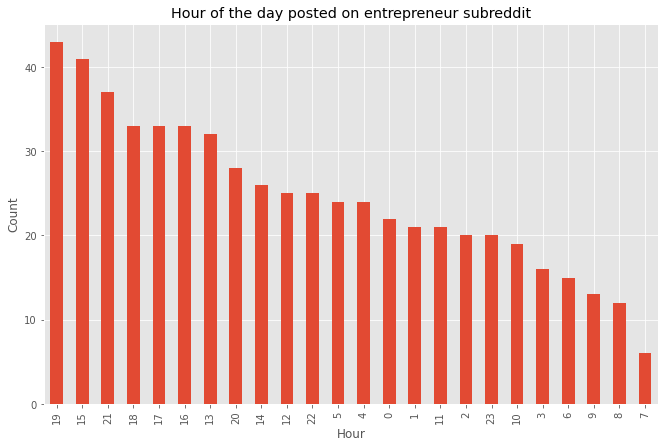

In [47]:
# Obtaining the hours
entre_df_time.dt.hour.value_counts().plot(kind='bar', title='Hour of the day posted on entrepreneur subreddit', figsize=(11,7))
plt.xlabel('Hour')
plt.ylabel('Count');

I can see that the most popular time to post is 19:00, 15:00, 21:00 18:00. It seems like entrepreneurs like to post in the later afternoon and evening. I'll group up the hourly timings to get a overall picture of the posting time.

In [48]:
# Group by the posters' hours, 0-6, 6-12, 12-18, 18-23.
entre_hour = entre_df_time.dt.hour
entre_hour_grpby = pd.cut(entre_hour, bins=[-1,6,12,18,23], labels=['Midnight','Morning','Afternoon','Evening'])
entre_hour_grpby

1      Afternoon
2       Midnight
3       Midnight
4        Morning
5       Midnight
         ...    
592      Evening
593     Midnight
594    Afternoon
595     Midnight
596    Afternoon
Name: created_utc, Length: 589, dtype: category
Categories (4, object): ['Midnight' < 'Morning' < 'Afternoon' < 'Evening']

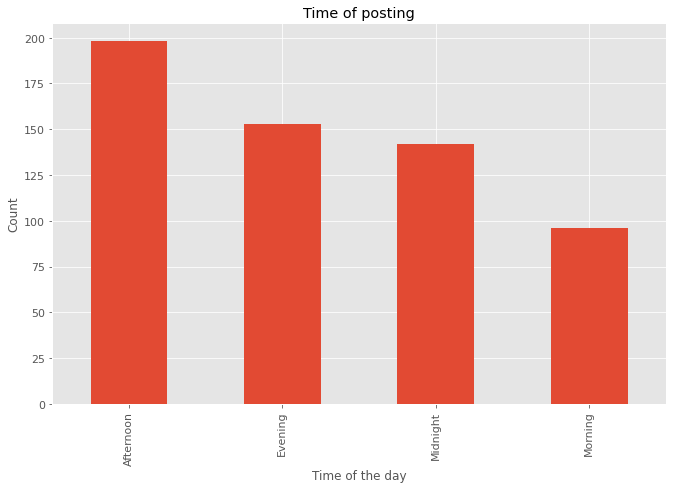

In [49]:
# Plotting the graph of the time of the post
entre_hour_grpby.value_counts().plot(kind='bar', title='Time of posting', figsize=(11,7))

plt.xlabel('Time of the day')
plt.ylabel('Count')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11);

It seems most users post during the afternoon and evening and they're least likely to post in the morning.

## EDA on Investing subreddit

### Distribution of frequency of the words

In [50]:
list_of_words = " ".join(invest_df_merged.text).split()
list_of_words

['key',
 'takeaway',
 'airbnb',
 'ipo',
 'filing',
 'blackrock',
 'inc',
 'million',
 'palantir',
 'technology',
 'inc',
 'nyse',
 'pltr',
 'pltr',
 'jump',
 'even',
 'though',
 'u',
 'market',
 'closed',
 'japan',
 'stock',
 'playing',
 'central',
 'bank',
 'rack',
 'billion',
 'gain',
 'expect',
 'amp',
 'p',
 'rise',
 'long',
 'run',
 'ftse',
 'moving',
 'sideways',
 'decade',
 'nikkei',
 'seen',
 'new',
 'high',
 'decade',
 'share',
 'traded',
 'hand',
 'pltr',
 'today',
 'wall',
 'street',
 'bet',
 'charity',
 'event',
 'view',
 'country',
 'stock',
 'market',
 'salesforce',
 'dip',
 'good',
 'buying',
 'opportunity',
 'determine',
 'stock',
 'past',
 'hype',
 'long',
 'term',
 'call',
 'hard',
 'hit',
 'industry',
 'market',
 'closed',
 'market',
 'price',
 'order',
 'filled',
 'chronologically',
 'dividend',
 'ing',
 'v',
 'student',
 'loan',
 'payment',
 'hypothetically',
 'would',
 'feel',
 'government',
 'banned',
 'automated',
 'trading',
 'algorithm',
 'macro',
 'trade',
 '

In [51]:
# Create a dictionary for the frequency of words
word_dict = {}
for word in list_of_words:
    if word in word_dict:
        word_dict[word] = word_dict[word] + 1
    else:
        word_dict[word] = 1

In [52]:
# Most frequently occuring word
max(word_dict, key=word_dict.get)

'stock'

In [53]:
# Sort the words frequency
sort_words_freq = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

for i in sort_words_freq[:10]:
    print(i[0], i[1])

stock 675
company 586
market 521
u 510
year 392
would 356
share 323
like 301
price 291
ing 232


In [54]:
# Adding the frequency of words dictionary into a dataframe
invest_freq_df = pd.DataFrame(sort_words_freq, columns=['word','frequency'])
invest_freq_df

,word,frequency
0,stock,675
1,company,586
2,market,521
3,u,510
4,year,392
...,...,...
8157,foreclosed,1
8158,modify,1
8159,fly,1
8160,kansa,1


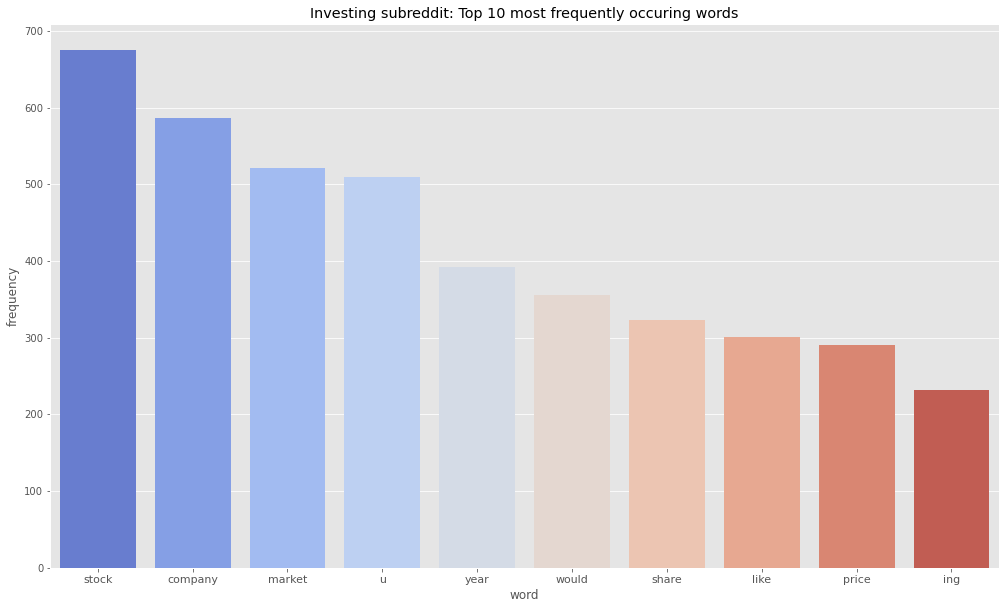

In [55]:
plt.figure(figsize=(17,10))
sns.barplot(x='word', y='frequency', data=invest_freq_df[:10], palette='coolwarm')
plt.title('Investing subreddit: Top 10 most frequently occuring words')
plt.xticks(fontsize=11);

The most frequently occuring word for the investing subreddit is 'stock'. Given that this is a subreddit where users share their investing ideas, it's not surprising to see 'stock' coming at the top. The next top word is 'company', in which users most likely ask what type of companies to invest. 'Market' and 'stock' goes together since users are sharing their trading ideas.

The 'u' could most likely mean the United States stocks market as it's most likely lemmantized. It's seems the US stocks market is popular on this subreddit.

In [56]:
# Top occuring words for the entrepreneur subreddit
entre_freq_df['word'].head(10)

0    business
1      people
2        like
3         get
4       would
5     product
6         one
7        idea
8        time
9        want
Name: word, dtype: object

In [57]:
# Top occuring words for the investing subreddit
invest_freq_df['word'].head(10)

0      stock
1    company
2     market
3          u
4       year
5      would
6      share
7       like
8      price
9        ing
Name: word, dtype: object

Given that the top occuring words from their respective subreddits are unique, I can safely assume that the model will not have issues distinguishing the posts.

### Distribution of length of text for titles and posts

#### Title

In [58]:
# Reset the index
invest_df_merged = invest_df_merged.reset_index(drop=True)
invest_df_merged

,text,label
0,key takeaway airbnb ipo filing,0.0
1,blackrock inc million palantir technology inc ...,0.0
2,pltr jump even though u market closed,0.0
3,japan stock playing central bank rack billion ...,0.0
4,expect amp p rise long run ftse moving sideway...,0.0
...,...,...
995,trying learn various ing strategy came across ...,0.0
996,pretend know lot finance economics sold positi...,0.0
997,bill ackman bet market recovery despite covid ...,0.0
998,news covid vaccine drugmaker pfizer pfe partne...,0.0


In [59]:
# Slicing the titles
invest_df_merged_title = pd.DataFrame(invest_df_merged.text.loc[:500])
invest_df_merged_title

,text
0,key takeaway airbnb ipo filing
1,blackrock inc million palantir technology inc ...
2,pltr jump even though u market closed
3,japan stock playing central bank rack billion ...
4,expect amp p rise long run ftse moving sideway...
...,...
496,concerned massive corporate debt equity bubble
497,bill ackman bet market recovery despite covid ...
498,goldman sachs boosted amp p target
499,ing mortgage note


In [60]:
# Split the words into a list and then count the number of words
invest_df_merged_title['length'] = invest_df_merged_title.text.apply(lambda x:len(x.split()))

In [61]:
invest_df_merged_title.head()

,text,length
0,key takeaway airbnb ipo filing,5
1,blackrock inc million palantir technology inc ...,8
2,pltr jump even though u market closed,7
3,japan stock playing central bank rack billion ...,8
4,expect amp p rise long run ftse moving sideway...,15


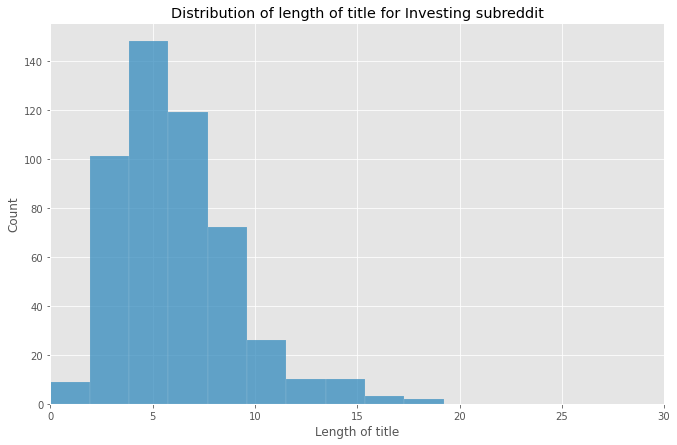

In [62]:
plt.figure(figsize=(11,7))
sns.histplot(data=invest_df_merged_title.length, bins=500)

plt.title('Distribution of length of title for Investing subreddit')
plt.xlabel('Length of title')
plt.xlim(0,30);

The distribution shows a heavy right-skewed graph, with most of the titles having a length of 5 and most of the titles falling in between the range of 2 to 10.

#### Posts

In [63]:
# Slicing the posts
invest_df_merged_post = pd.DataFrame(invest_df_merged.text.loc[500:])
invest_df_merged_post

,text
500,hi everyone work pm large tech company part jo...
501,blackrock inc acquired new position share pala...
502,pltr stock data u market holiday rest world se...
503,one japan biggest stock or reported record gai...
504,generally new ing think might make sense assum...
...,...
995,trying learn various ing strategy came across ...
996,pretend know lot finance economics sold positi...
997,bill ackman bet market recovery despite covid ...
998,news covid vaccine drugmaker pfizer pfe partne...


In [64]:
# Split the words into a list and then count the number of words
invest_df_merged_post['length'] = invest_df_merged_post.text.apply(lambda x:len(x.split()))

In [65]:
invest_df_merged_post.head()

,text,length
500,hi everyone work pm large tech company part jo...,961
501,blackrock inc acquired new position share pala...,112
502,pltr stock data u market holiday rest world se...,39
503,one japan biggest stock or reported record gai...,414
504,generally new ing think might make sense assum...,74


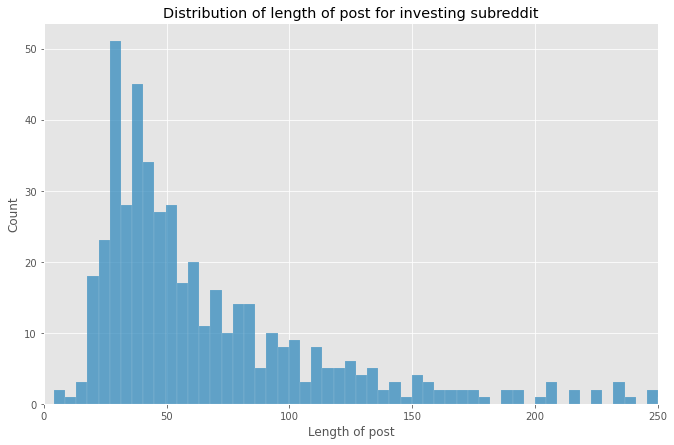

In [66]:
plt.figure(figsize=(11,7))
sns.histplot(data=invest_df_merged_post.length, bins=500)

plt.title('Distribution of length of post for investing subreddit')
plt.xlabel('Length of post')
plt.xlim(0,250);

The distribution for the length of the posts for the investing subreddit shows a right-tailed skewed graph. Most of the posts have an average of 25 words in their posts and most of the posts fall in the range between 25 to 60 words.

### Timing of the posts

In [67]:
# Find the columns with time zone
invest_df.columns[invest_df.columns.str.contains('utc|time|created')]

Index(['approved_at_utc', 'created', 'banned_at_utc', 'created_utc'], dtype='object')

In [68]:
# Drop the duplicates
invest_df_time = invest_df[['title','selftext','created_utc']].drop_duplicates(subset=['selftext']).drop(['title','selftext'], axis=1)
invest_df_time

,created_utc
2,1.606437e+09
3,1.606440e+09
4,1.606396e+09
5,1.606438e+09
6,1.606439e+09
...,...
510,1.605205e+09
511,1.605187e+09
512,1.605153e+09
513,1.605177e+09


In [69]:
# Converting to datatime
invest_df_time = pd.to_datetime(invest_df_time['created_utc'], unit='s')
invest_df_time

2     2020-11-27 00:32:11
3     2020-11-27 01:16:54
4     2020-11-26 13:02:06
5     2020-11-27 00:39:43
6     2020-11-27 01:08:32
              ...        
510   2020-11-12 18:18:17
511   2020-11-12 13:13:21
512   2020-11-12 03:50:03
513   2020-11-12 10:26:40
514   2020-11-12 18:49:51
Name: created_utc, Length: 500, dtype: datetime64[ns]

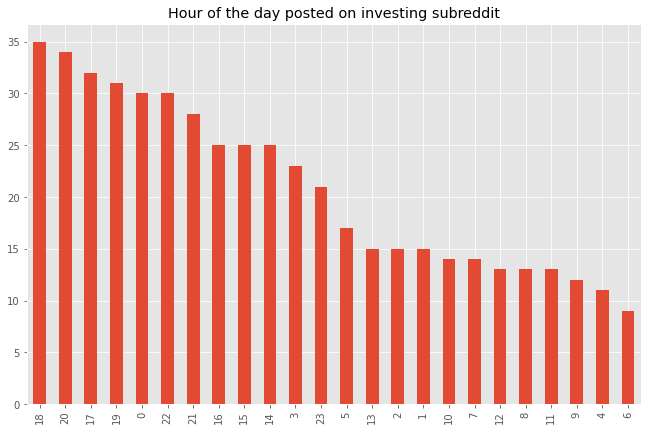

In [70]:
# Obtaining the hours
invest_df_time.dt.hour.value_counts().plot(kind='bar', title='Hour of the day posted on investing subreddit', figsize=(11,7));

I can see that the most popular time to post is 18:00, 20:00, 17:00, 19:00. It seems like these traders like to post in the evening. I'll group up the hourly timings to get a overall picture of the posting time.

In [71]:
# Group by the posters' hours, 0-6, 6-12, 12-18, 18-23.
invest_hour = invest_df_time.dt.hour
invest_hour_grpby = pd.cut(invest_hour, bins=[-1,6,12,18,23], labels=['Midnight','Morning','Afternoon','Evening'])
invest_hour_grpby

2       Midnight
3       Midnight
4      Afternoon
5       Midnight
6       Midnight
         ...    
510    Afternoon
511    Afternoon
512     Midnight
513      Morning
514    Afternoon
Name: created_utc, Length: 500, dtype: category
Categories (4, object): ['Midnight' < 'Morning' < 'Afternoon' < 'Evening']

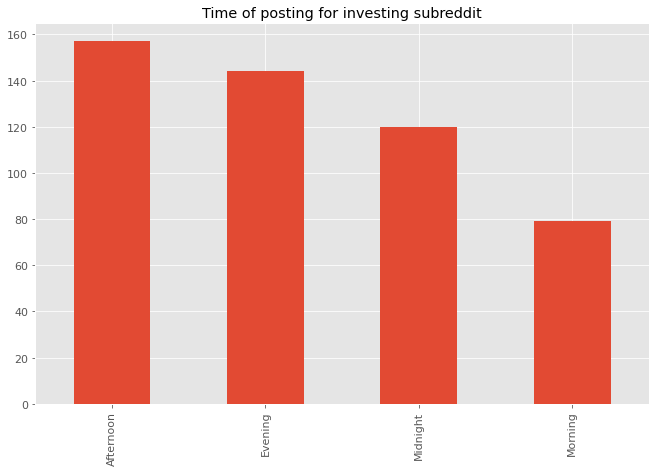

In [72]:
# Plotting the graph of the time of the post
invest_hour_grpby.value_counts().plot(kind='bar', title='Time of posting for investing subreddit', figsize=(11,7))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11);

It seems most users post during the afternoon and evening and they're least likely to post in the morning, similar to the Entrepreneur subbredit

# Merge both subreddit dataframes

In [73]:
clean_invest_df = pd.read_csv('./datasets/cleaned_invest_df.csv')

In [74]:
clean_entre_df = pd.read_csv('./datasets/cleaned_entre_df.csv')

In [75]:
final_df = pd.concat([clean_entre_df,clean_invest_df],axis=0)
final_df

,text,label
0,driven individual rushing towards dream ever s...,1.0
1,reduce bounce rate webpage,1.0
2,made animated summary lean start eric ries hop...,1.0
3,skate ramp business,1.0
4,help getting textile prototype created,1.0
...,...,...
995,trying learn various ing strategy came across ...,0.0
996,pretend know lot finance economics sold positi...,0.0
997,bill ackman bet market recovery despite covid ...,0.0
998,news covid vaccine drugmaker pfizer pfe partne...,0.0


In [76]:
# Reset the index
final_df.reset_index(drop=True, inplace=True)

In [77]:
# A null value found in the dataframe
final_df[final_df.isnull().any(axis=1)]

,text,label
1340,NaN,0.0


In [78]:
# Drop the null value
final_df.dropna(inplace=True)

In [79]:
# No duplicates found
final_df.duplicated().sum()

0

In [80]:
final_df

,text,label
0,driven individual rushing towards dream ever s...,1.0
1,reduce bounce rate webpage,1.0
2,made animated summary lean start eric ries hop...,1.0
3,skate ramp business,1.0
4,help getting textile prototype created,1.0
...,...,...
2162,trying learn various ing strategy came across ...,0.0
2163,pretend know lot finance economics sold positi...,0.0
2164,bill ackman bet market recovery despite covid ...,0.0
2165,news covid vaccine drugmaker pfizer pfe partne...,0.0


## Save the final df

In [81]:
final_df.to_csv('./datasets/final_df.csv', index=False)